In [56]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np

In [3]:
matplotlib inline

In [4]:
simulator = Aer.get_backend('qasm_simulator')

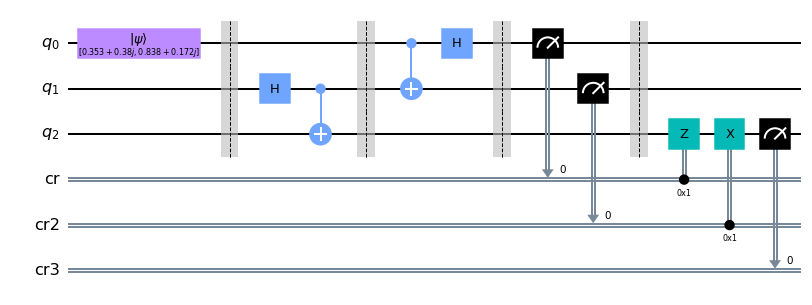

In [110]:
# Quantum teleportation protocol 
psi = quantum_info.random_statevector(2)
cr = ClassicalRegister(1, name='cr')
cr2 = ClassicalRegister(1, name='cr2')
cr3 = ClassicalRegister(1, name='cr3')
qr = QuantumRegister(3, name='q')
circuit = QuantumCircuit(qr, cr, cr2, cr3)

# Initializing the first qubit as the one alice has
circuit.initialize(psi.data, 0)
circuit.barrier()

# Creating the entangled state for Alice and bob
circuit.h(1)
circuit.cx(1, 2)

# Teleportation
circuit.barrier()
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure([0, 1], [0, 1])

# Conditional gates
circuit.barrier()
circuit.z(2).c_if(cr, 1)
circuit.x(2).c_if(cr2, 1)

# Measuring the final telported state
circuit.measure(2, 2)
circuit.draw(output='mpl')

{'0 0 0': 1386, '0 0 1': 1375, '0 1 0': 1355, '0 1 1': 1394, '1 0 0': 3522, '1 0 1': 3690, '1 1 0': 3622, '1 1 1': 3656}


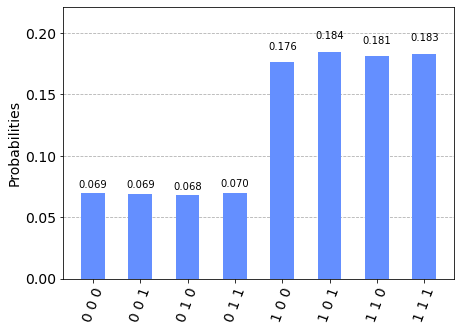

In [115]:
result = execute(circuit, backend = simulator, shots=20000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

The output matches the initial state!
[0.2755, 0.7245]
[0.35256433+0.37962573j 0.83779214+0.17229924j]


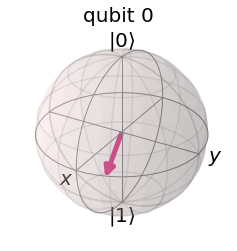

In [121]:
# Testing the results
zeros = 0
ones = 0
i=0
tol = 0.25
for output in counts:
    if output[0] == '0':
        zeros += counts.get(output)
    elif output[0] == '1':
        ones += counts.get(output)
    i += 1

newpsi = [zeros/(zeros+ones), ones/(zeros+ones)]
if np.abs(newpsi[0] - np.abs(psi.data[0]))< tol and np.abs(newpsi[1] - np.abs(psi.data[1]))< tol:
    print('The output matches the initial state!')
else:
    print('The output does not match the initial state!')
    print('The difference is' + str(newpsi - np.abs(psi.data)))
print(newpsi)
print(psi.data)
plot_bloch_multivector(newpsi)

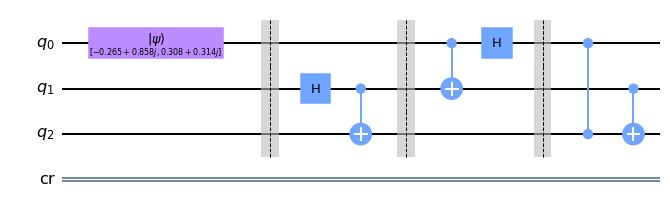

In [131]:
# Quantum teleportation protocol with no conditional gates
psi = quantum_info.random_statevector(2)
cr = ClassicalRegister(1, name='cr')
#cr2 = ClassicalRegister(1, name='cr2')
#cr3 = ClassicalRegister(1, name='cr3')
qr = QuantumRegister(3, name='q')
circuit2 = QuantumCircuit(qr, cr)

# Initializing the first qubit as the one alice has
circuit2.initialize(psi.data, 0)
circuit2.barrier()

# Creating the entangled state for Alice and bob
circuit2.h(1)
circuit2.cx(1, 2)

# Teleportation
circuit2.barrier()
circuit2.cx(0, 1)
circuit2.h(0)
# circuit2.measure([0, 1], [0, 1])

# Conditional gates
circuit2.barrier()
circuit2.cz(0, 2)
circuit2.cx(1, 2)

# Measuring the final teleported state
#circuit2.measure(2, 0)
circuit2.draw(output='mpl')

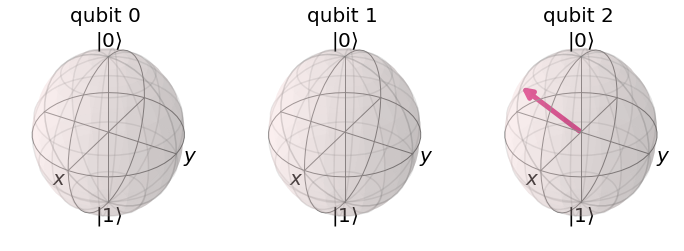

In [132]:
state = Statevector.from_instruction(circuit2)
plot_bloch_multivector(state)

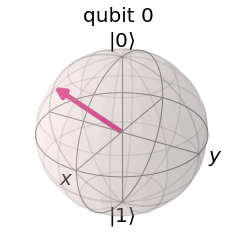

In [133]:
plot_bloch_multivector(psi)